**KNN Classification – Wine Quality**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv("wine.csv")
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
X = data.drop('quality', axis=1)   # Features
y = data['quality']               # Target (0 or 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"K = {k}, Accuracy = {acc}")

K = 1, Accuracy = 0.753125
K = 3, Accuracy = 0.70625
K = 5, Accuracy = 0.70625
K = 7, Accuracy = 0.69375
K = 9, Accuracy = 0.709375


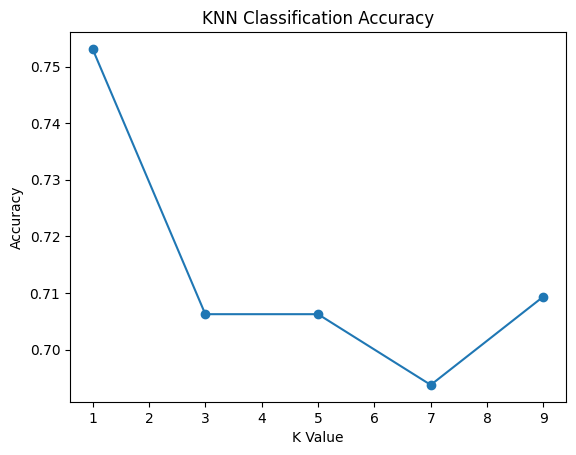

In [8]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Classification Accuracy")
plt.show()

In [9]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 89  52]
 [ 41 138]]


**KNN_Regression_mtcars**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [23]:
data = pd.read_csv("mtcars.csv")
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [24]:
data = data.drop(columns=['model'])   # string column

In [25]:
X = data.drop('mpg', axis=1)
y = data['mpg']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
k_values = [1, 3, 5, 7, 9]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    print("K =", k, "MSE =", mse)


K = 1 MSE = 4.729999999999995
K = 3 MSE = 8.218730158730155
K = 5 MSE = 8.855257142857138
K = 7 MSE = 10.162536443148682
K = 9 MSE = 10.674126984126985


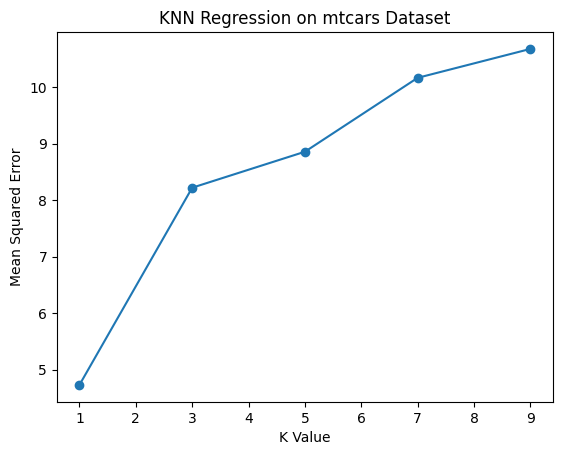

In [29]:
plt.plot(k_values, mse_values, marker='o')
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regression on mtcars Dataset")
plt.show()


**Train & Test KNN for Different K Values (mtcars – Regression)**

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [31]:
data = pd.read_csv("mtcars.csv")

# remove string column
data = data.drop(columns=['model'])


In [32]:
X = data.drop('mpg', axis=1)
y = data['mpg']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
k_values = [1, 3, 5, 7, 9]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)

    # TRAIN
    knn.fit(X_train, y_train)

    # TEST
    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    print(f"K = {k} → Mean Squared Error = {mse}")


K = 1 → Mean Squared Error = 4.729999999999995
K = 3 → Mean Squared Error = 8.218730158730155
K = 5 → Mean Squared Error = 8.855257142857138
K = 7 → Mean Squared Error = 10.162536443148682
K = 9 → Mean Squared Error = 10.674126984126985


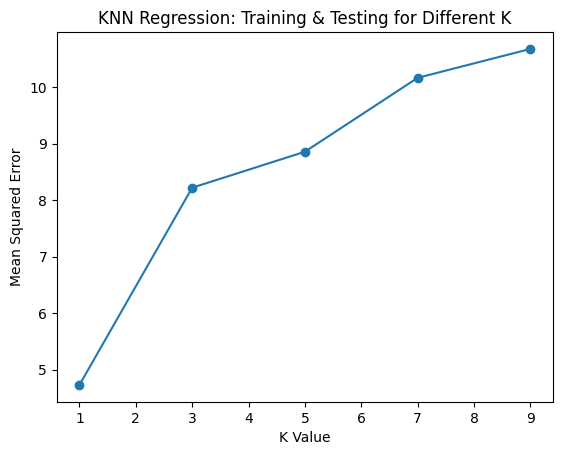

In [36]:
plt.plot(k_values, mse_values, marker='o')
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regression: Training & Testing for Different K")
plt.show()
